In [66]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv  

In [3]:
# Initialize the Panel Extensions (for Plotly)
import panel as pn
pn.extension("plotly")  

In [67]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(map_box_api)
 

In [68]:
# Import the CSVs to Pandas DataFrames
file_path = Path("../PyViz-Homework/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")

file_path = Path("../PyViz-Homework/toronto_neighbourhoods_coordinates.csv")
neighbourhood_locations = pd.read_csv(file_path)

In [69]:
# Getting the data from the top 10 expensive neighbourhoods
ten_most_expensive = to_data.groupby('neighbourhood').mean().sort_values(ascending=False, by='average_house_value')
ten_most_expensive.head(10)

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
neighbourhood,,,,,,,,,,,
Bridle Path-Sunnybrook-York Mills,2260.00,331.25,0.00,36.25,90.00,25.0,40.00,0.00,1526485.75,2360.75,2321.75
Forest Hill South,1742.50,2031.25,1.25,61.25,45.00,75.0,1027.50,3.75,1195992.50,1781.00,1313.75
Lawrence Park South,3472.50,773.75,0.00,126.25,38.75,225.0,966.25,16.25,1094027.75,1954.00,1372.75
Rosedale-Moore Park,2498.75,4641.25,0.00,486.25,245.00,327.5,1618.75,2.50,1093640.00,1909.75,1537.25
St.Andrew-Windfields,3225.00,1670.00,0.00,185.00,552.50,97.5,586.25,5.00,999107.00,1880.25,1384.50
Casa Loma,916.25,2310.00,0.00,288.75,201.25,162.5,1192.50,2.50,981064.25,1873.75,1547.75
Bedford Park-Nortown,4865.00,1981.25,0.00,43.75,57.50,287.5,1275.00,88.75,930415.25,1786.75,1255.00
Forest Hill North,1488.75,3392.50,0.00,12.50,16.25,82.5,402.50,1.25,851680.50,1722.75,1245.50
Kingsway South,2326.25,576.25,0.00,66.25,48.75,20.0,336.25,2.50,843234.25,1736.75,1622.00


In [70]:
# Calculate the mean number of dwelling types units per year
dwelling_types = to_data.groupby('year').mean()
dwelling_types.head()
dwelling_types.drop(columns=['average_house_value', 'shelter_costs_owned', 'shelter_costs_rented'])

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
year,,,,,,,,
2001,2149.500000,2535.821429,0.535714,649.964286,373.964286,169.892857,835.000000,21.714286
2006,1906.142857,2710.000000,1.178571,495.928571,390.642857,314.964286,1163.214286,9.535714
2011,1963.857143,3065.857143,0.714286,517.714286,431.107143,319.642857,1170.678571,15.464286
2016,1926.285714,3523.357143,0.678571,508.571429,439.750000,347.035714,1182.678571,20.321429


In [71]:
# Calculate the average monthly shelter costs for owned and rented dwellings
to_data = pd.read_csv(Path("../PyViz-Homework/toronto_neighbourhoods_census_data.csv"))
avg_monthly_costs = to_data.groupby('year').mean()
avg_monthly_costs.head()
avg_monthly_costs.drop(columns=['single_detached_house', 'apartment_five_storeys_plus', 'movable_dwelling', 'semi_detached_house', 'row_house', 'duplex', 'apartment_five_storeys_less', 'other_house', 'average_house_value'])

,shelter_costs_owned,shelter_costs_rented
year,,
2001,846.878571,1085.935714
2006,1316.800000,925.414286
2011,1448.214286,1019.792857
2016,1761.314286,1256.321429


In [72]:
# Define Panel visualization functions
def neighbourhood_map():
    """Neighbourhood Map"""
    file_path = Path("../PyViz-Homework/toronto_neighbourhoods_coordinates.csv")
    neighbourhood_locations = pd.read_csv(file_path)
    
    # Calculate the mean values for each neighborhood
    avg_neighbourhood = to_data.groupby("neighbourhood").mean()
    avg_neighbourhood.reset_index(inplace=True)
    
    # Join the average values with the neighbourhood locations

    avg_value_location = neighbourhood_locations.merge(avg_neighbourhood, on = "neighbourhood", how = "outer")
    
    # Create a scatter mapbox to analyze neighbourhood info
    map_plot = px.scatter_mapbox(
    avg_value_location,
    lat="lat",
    lon="lon",
    size="average_house_value",
    color="average_house_value",
    title = "Average House Values in Toronto",
    hover_name = "neighbourhood",
    hover_data = ["single_detached_house",
                  "apartment_five_storeys_plus",
                  "movable_dwelling",
                  "semi_detached_house",
                  "row_house",
                  "duplex",
                  "apartment_five_storeys_less",
                  "other_house"]
    )
    return map_plot
neighbourhood_map()

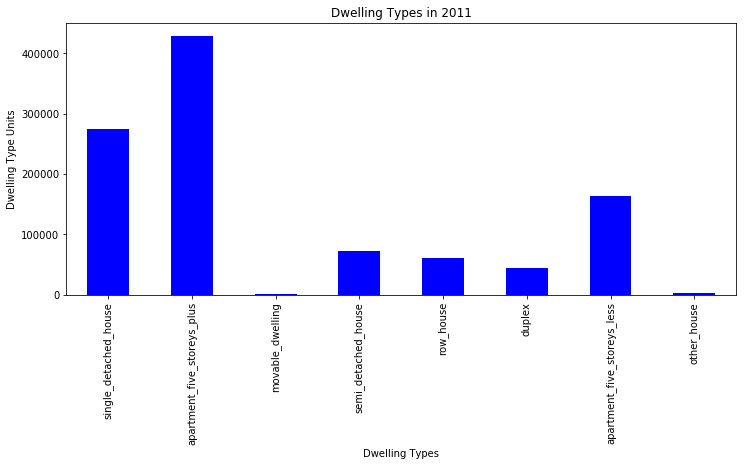

In [98]:
def create_bar_chart(year):
    """
    Create a barplot based in the data argument.
    """
    dwelling_types = to_data.groupby('year').sum()
    dwelling_bar = dwelling_types.drop(columns=['average_house_value', 'shelter_costs_owned', 'shelter_costs_rented'])
    
    if year == 2001:
        # Bar chart for 2001
        
        bar_2001 = dwelling_bar.iloc[0].plot.bar(figsize=[12,5],
                                       color="blue",
                                       title="Dwelling Types in 2001"
                                       )
        plt.xlabel("Dwelling Types")
        plt.ylabel("Dwelling Type Units")
    
        return bar_2001

    elif year == 2006:
        # Bar chart for 2006
        
        bar_2006 = dwelling_bar.iloc[1].plot.bar(figsize=[12,5],
                                       color="blue",
                                       title="Dwelling Types in 2006"
                                       )
        plt.xlabel("Dwelling Types")
        plt.ylabel("Dwelling Type Units")
    
        return bar_2006

    elif year == 2011:
        # Bar chart for 2011
        
        bar_2011 = dwelling_bar.iloc[2].plot.bar(figsize=[12,5],
                                       color="blue",
                                       title="Dwelling Types in 2011"
                                       )
        plt.xlabel("Dwelling Types")
        plt.ylabel("Dwelling Type Units")
    
        return bar_2011

    elif year == 2016:
        # Bar chart for 2016
        
        bar_2016 = dwelling_bar.iloc[3].plot.bar(figsize=[12,5],
                                       color="blue",
                                       title="Dwelling Types in 2016"
                                       )
        plt.xlabel("Dwelling Types")
        plt.ylabel("Dwelling Type Units")
    
        return bar_2016
    
create_bar_chart(2011)

In [88]:
def create_line_chart(type):
    """
    Create a line chart based in the data argument.
    """
    if type == "rented":
        plt.clf()
        rented_dwellings = avg_monthly_costs["shelter_costs_rented"].hvplot.line(figsize=[12,5], 
                                                                                    color="red",
                                                                                    title="Average Monthly Shelter Cost for Rented Dwellings in Toronto")
        return rented_dwellings
    
    elif type == "owned":
        plt.clf()
        owned_dwellings = avg_monthly_costs["shelter_costs_owned"].hvplot.line(figsize=[12,5], 
                                                                                    color="red",
                                                                                    title="Average Monthly Shelter Cost for Owned Dwellings in Toronto")
        return owned_dwellings
    
create_line_chart("owned")

:Curve   [year]   (shelter_costs_owned)

<Figure size 432x288 with 0 Axes>

year
2001    289882.885714
2006    424059.664286
2011    530424.721429
2016    664068.328571
Name: average_house_value, dtype: float64

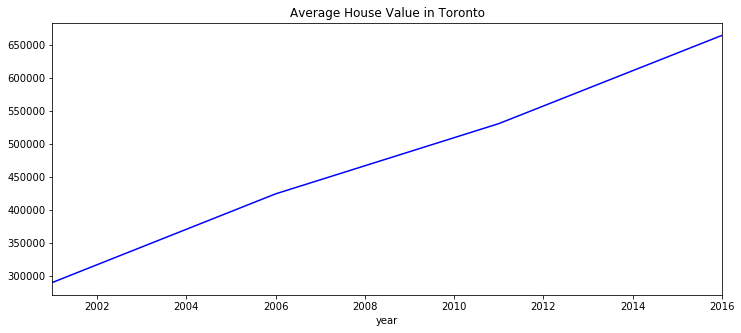

In [20]:
def average_house_value():
    """Average house values per year."""

    avg_housing_value = avg_monthly_costs["average_house_value"]
    avg_housing_value.plot.line(figsize=[12,5], 
                            color="blue",
                            title="Average House Value in Toronto")
    
    return avg_housing_value
average_house_value()    

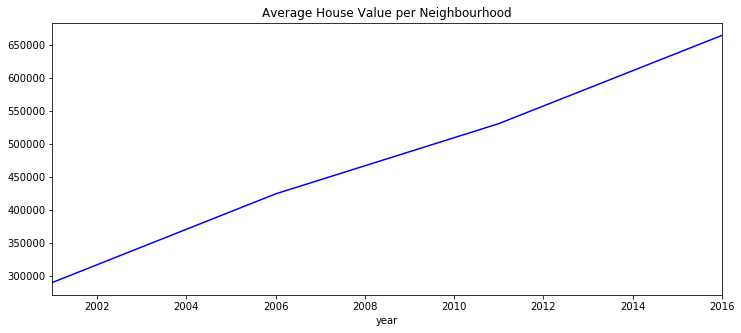

In [34]:
def average_value_by_neighbourhood():
    """Average house values by neighbourhood."""

    avg_neighbourhood_value = avg_monthly_costs["average_house_value"]
    avg_neighbourhood_value.plot.line(figsize=[12,5], 
                            color="blue",
                            title="Average House Value per Neighbourhood")
    
    return avg_neighbourhood_value.plot
average_value_by_neighbourhood()
    
    


In [22]:
def number_dwelling_types():
    """Number of dwelling types per year"""
    
    dwellings_types = to_data.drop(columns=["average_house_value", "shelter_costs_owned", "shelter_costs_rented"])
    dwellings_types_neighbourhood_plot = dwellings_types.hvplot.bar("year", groupby="neighbourhood", title="Number of Dwelling Types per Year", width= 500, height = 500, rot=90)
    
    return dwellings_types_neighbourhood_plot
number_dwelling_types()

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

In [23]:
def top_most_expensive_neighbourhoods():
    """Top 10 most expensive neighbourhoods."""
    
    ten_most_expensive_plot = ten_most_expensive['average_house_value'].head(10).hvplot.bar(
        ylabel='average house value',
        xlabel='neighbourhood',
        label='Top Ten Most Expensive Neighbourhoods',
        rot=90,
        height=400,
        width=650,
    
    )
    
    return ten_most_expensive_plot
top_most_expensive_neighbourhoods()

:Bars   [neighbourhood]   (average_house_value)

Tabs
    [0] Markdown(str)
    [1] Column
        [0] Markdown(str)
        [1] Column
            [0] Column()
            [1] Row
                [0] Plotly(Figure, name='interactive08164')
    [2] Column
        [0] Markdown(str)
        [1] Column
            [0] Column()
            [1] Row
                [0] Str(SeriesPlotMethods, name='interactive08173')
    [3] Column
        [0] Markdown(str)
        [1] Column
            [0] Column()
            [1] Row
                [0] Row(name='interactive08182')
                    [0] HoloViews(DynamicMap, name='interactive08182')
                    [1] Column
                        [0] WidgetBox
                            [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                        [1] VSpacer()
    [4] Column
        [0] Markdown(str)
        [1] Column
            [0] Column()
            [1] Row
                [0] DataFrame(Series, name='interactive08227')
    [5] Column
        [0] Markdown(str)
        [1] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Bars, name='interactive08236')

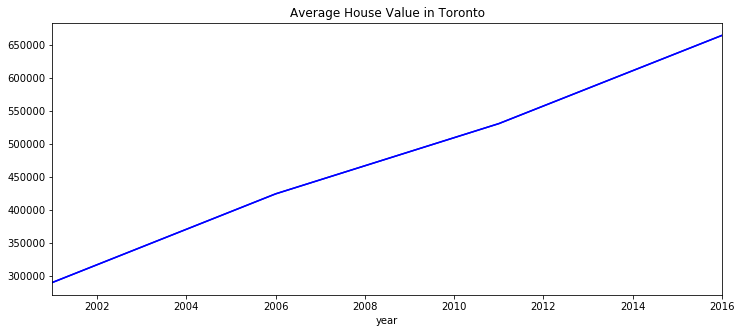

In [105]:
# Create a Title for the Dashboard

title = pn.pane.Markdown("""#Data From Toronto Neighbourhoods Between 2001 to 2016""",width = 800)


# Define a welcome text
intro = pn.pane.Markdown(
"""
Here you will find real estate data from neighbourhoods in Toronto from 2001 to 2016.

1. Introduction
2. Mapbox Plot
3. Average Value by Neighbourhood
4. Dwelling Units per Year
5. Average Value per Year
6. Ten Most Expensive Neighbourhoods

"""
)

# Create a tab layout for the dashboard
tab_2_column = pn.Column(("## Neighbourhood Map"),
                         neighbourhood_map)

tab_3_column = pn.Column(("### Average House Value by Neighbourhood"),
                         average_value_by_neighbourhood)
                         

tab_4_column = pn.Column(("## Dwelling Units per Year"), 
                         number_dwelling_types)

                         
tab_5_column = pn.Column(("## Average Value per Year"),
                        average_house_value)

tab_6_column = pn.Column(("## Ten Most Expensive Neighbourhoods"),
                        top_most_expensive_neighbourhoods)



# Create the main dashboard
dashboard = pn.Tabs(
    ("Intro",intro),
    ("Mapbox Plot", tab_2_column),
    ("Average Value by Neighbourhood", tab_3_column),
    ("Dwelling Units per Year", tab_4_column),
    ("Ten Most Expensive Neighbourhoods", tab_5_column),
    ("Dwelling Types per Year", tab_6_column)
)
                    
dashboard


# Had an issue with posting the bar chart and line chart on the dashboard. Found myself switching the coding sturcture multplie times in order to 
# allow it to post, however wasn't successful.

In [106]:
dashboard.servable()

Tabs
    [0] Markdown(str)
    [1] Column
        [0] Markdown(str)
        [1] Column
            [0] Column()
            [1] Row
                [0] Plotly(Figure, name='interactive08164')
    [2] Column
        [0] Markdown(str)
        [1] Column
            [0] Column()
            [1] Row
                [0] Str(SeriesPlotMethods, name='interactive08173')
    [3] Column
        [0] Markdown(str)
        [1] Column
            [0] Column()
            [1] Row
                [0] Row(name='interactive08182')
                    [0] HoloViews(DynamicMap, name='interactive08182')
                    [1] Column
                        [0] WidgetBox
                            [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                        [1] VSpacer()
    [4] Column
        [0] Markdown(str)
        [1] Column
            [0] Column()
            [1] Row
                [0] DataFrame(Series, name='interactive08227')
    [5] Column
        [0] Markdown(str)
        [1] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Bars, name='interactive08236')